### 线性回归解决连续问题，逻辑回归解决离散问题

Iris鸢尾花数据集逻辑回归问题  



逻辑回归，调用sklearn.linear_model模块的LogisticRegression模型；  
生成二维或三维网格矩阵，调用函数meshgrid();  
绘制具有非规则矩形网格的伪彩色图，调用函数pcolormesh()。



鸢尾花数据集共收集了三类鸢尾花，即Setosa鸢尾花、Versicolour鸢尾花、
Virginica鸢尾花，每一类鸢尾花收集50条样本记录，共150条。数据表中，
四列为花萼长度，花萼宽度，花瓣长度，花瓣宽度等4个用于识别鸢尾花属
性，第5列为鸢尾花的类别。

二分类：逻辑回归使用的是 Sigmoid 函数 将线性组合的结果映射为概率。  
多分类：逻辑回归使用的是 Softmax 函数 来计算每个类别的概率。

Sigmoid：常用于二分类问题，输出概率值。  
Tanh：适用于需要对称输出的场景。  
ReLU 和 Leaky ReLU：常用于深度神经网络的隐藏层，处理非线性问题。  
Softmax：用于多分类问题，输出多个类的概率。   
ELU：类似 ReLU，但在负值区域有更平滑的梯度。  

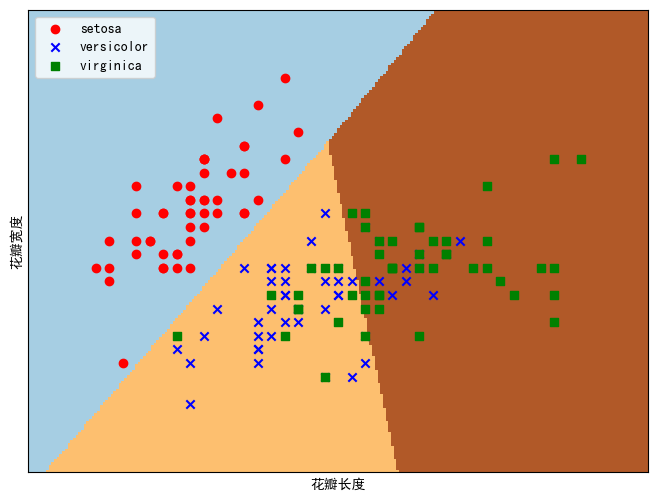

In [179]:
# 调库
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import math

# 直接加载库里的数据集
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
plt.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False  # 允许显示负号

# 按表格中第一列为索引默认输出的1~150
iris = load_iris()
x = iris.data[:, :2]  # 取出前两列特征集
y = iris.target  # 获取目标标签（0, 1, 2 对应不同的鸢尾花种类）

# 构建模型
lx = LogisticRegression(C=1e5)  # 精度
lx.fit(x, y)  # 使用前两列特征训练Logistic回归模型

# 生成两个网格矩阵
h = .02  # 网格间隔
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5  # 第一个特征的最小值和最大值
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5  # 第二个特征的最小值和最大值
# xx 和 yy 是创建的两个网格矩阵，用于在特征空间中生成一系列点，这些点将用于预测类别。
# np.meshgrid() 函数会根据这些最小值和最大值，按照步长 h = 0.02 来生成一个规则的网格。
# 它会在整个特征空间内均匀地生成点，并且包含数据集中所有的点
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 预测
# 将网格矩阵中的点进行预测，并将预测结果重新塑造成与 xx 形状一致的矩阵，以便绘制决策边界。
z = lx.predict(np.c_[xx.ravel(), yy.ravel()])  # ravel转化为一维数组这样可以给模型提供数据进行预测
z = z.reshape(xx.shape)  # 转换回

plt.figure(1, figsize=(8, 6))
# 创建具有非规则矩形网格的伪彩色图
# 使用 pcolormesh 来绘制非规则矩形网格的伪彩色图，显示分类决策边界。
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired, shading='auto')
plt.scatter(x[:50, 0], x[:50, 1], color='r', marker='o', label='setosa')
plt.scatter(x[50: 100, 0], x[50: 100, 1], color='b', marker='x', label='versicolor')
plt.scatter(x[100: , 0], x[100: , 1], color='g', marker='s', label='virginica')

plt.xlabel('花瓣长度')
plt.ylabel('花瓣宽度')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc=2)
plt.show()


**z = lx.predict(np.c_[xx.ravel(), yy.ravel()])解读**   
**xx 和 yy：**  

这是通过 np.meshgrid() 函数生成的两个二维数组，表示特征空间中的网格点。xx 包含了所有点的第一个特征值（通常是 x 坐标），yy 包含了所有点的第二个特征值（通常是 y 坐标）。  



  
**ravel()：**  

ravel() 是 NumPy 提供的一个函数，用于将多维数组展平成一维数组。  
xx.ravel() 会将 xx（二维数组）转换为一个一维数组，同样的 yy.ravel() 会将 yy 转换为一维数组。  




**np.c_[xx.ravel(), yy.ravel()]：**  

#### np.c_[ ] 是 NumPy 的一个简便的函数，用来将两个一维数组按列进行拼接。  
在这里，np.c_[xx.ravel(), yy.ravel()] 是将展平后的 xx 和 yy 数组按列拼接在一起，形成一个二维数组，每一行是一个二维点的坐标，形状为 (N, 2)，其中 N 是网格点的总数。    
例如，假设 xx.ravel() 和 yy.ravel() 各自包含 100 个元素，那么拼接后的结果是一个形状为 (100, 2) 的数组，代表了 100 个网格点的坐标。  




**lx.predict()：**  

lx 是训练好的 Logistic 回归模型。predict() 方法用于对输入的数据进行分类预测。这里输入的是网格点的坐标（形状为 (N, 2)），模型会根据训练时的权重参数对这些坐标进行分类。  
输出是一个一维数组 z，其中每个元素表示该网格点的预测类别，长度为 N，即网格点的总数量。  

### 逻辑回归-单回归(源)

## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 


This is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.





$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$




Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

In [134]:
# 西格玛函数，用于将线性组合的结果转换为概率。
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    
    return g

# 计算代价，衡量当前模型的预测效果。
def compute_cost_logistic(x, y, w, b):
    m = x.shape[0]  # 样本数量
    cost = 0
    
    for i in range(m):
        z_i = np.dot(x[i], w) + b  # 计算线性组合 wx + b
        f_wb_i = sigmoid(z_i)  # 使用 Sigmoid 函数计算概率
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i) # 代价函数

    cost = cost / m  # 平均代价

    return cost

# 计算代价函数对权重 w 和偏置项 b 的梯度，调整梯度减小代价
def compute_gradient_logistic(x, y, w, b):
    m, n = x.shape  # 样本数量 m，特征数量 n
    dj_dw = np.zeros((n,))  # 初始化权重的梯度
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w) + b)  # 计算预测概率
        err_i = f_wb_i - y[i]  # 计算预测误差
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i, j]  # 累加权重的梯度
        dj_db = dj_db + err_i  # 累加偏置项的梯度
    dj_dw = dj_dw / m  # 平均权重的梯度
    dj_db = dj_db / m  # 平均偏置项的梯度

    return dj_db, dj_dw

# 梯度下降，减小代价函数
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    J_history = []  # 用来存储每次迭代的代价
    w = deepcopy(w_in)  # 复制初始权重
    b = b_in  # 初始化偏置项

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(x, y, w, b)  # 计算梯度

        w = w - alpha * dj_dw  # 更新权重 w
        b = b - alpha * dj_db  # 更新偏置 b

        if i < 100000:
            J_history.append(compute_cost_logistic(x, y, w, b))  # 记录代价

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")  # 每10%迭代打印一次代价

    return w, b, J_history

Iteration    0: Cost 0.684610468560574
Iteration 1000: Cost 0.1590977666870457
Iteration 2000: Cost 0.08460064176930078
Iteration 3000: Cost 0.05705327279402531
Iteration 4000: Cost 0.04290759421682
Iteration 5000: Cost 0.03433847729884557
Iteration 6000: Cost 0.02860379802212006
Iteration 7000: Cost 0.02450156960879306
Iteration 8000: Cost 0.02142370332569295
Iteration 9000: Cost 0.019030137124109114

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


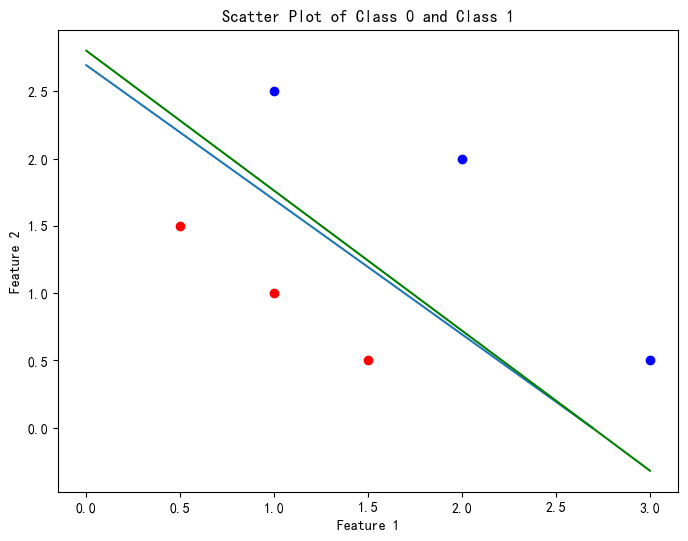

In [150]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

x_class_0 = x_train[y_train == 0]
x_class_1 = x_train[y_train == 1]

plt.figure(figsize=(8, 6))

plt.scatter(x_class_0[:, 0], x_class_0[:, 1], color='r', label='class 0')
plt.scatter(x_class_1[:, 0], x_class_1[:, 1], color='b', label='class 1')

# 决策边界 直线方程
x0 = -b_out / w_out[1]  # 当 x1 = 0 时，计算 x0 的值
x1 = -b_out / w_out[0]  # 当 x0 = 0 时，计算 x1 的值
plt.plot([0, x1], [x1, 0])  # # 画出直线：一端点是 (0, x1)，另一端点是 (x1, 0)

# 精准决策边界
x_values = np.linspace(0, 3, 100)  # 定义 x_0 的范围
y_values = -(w_out[0] * x_values + b_out) / w_out[1]  # 计算对应的 x_1
plt.plot(x_values, y_values, label='Decision Boundary', color='g')  # 绘制直线

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Class 0 and Class 1')
plt.show()

![jupyter](1.png)  
![jupyter](2.png)  
![jupyter](3.png)  
![jupyter](4.png)  
![jupyter](5.png)

### 多分类逻辑回归---Softmax回归  
Softmax函数：替换原来的 Sigmoid 函数，Softmax 函数将每个类的线性组合值转换为概率，并且这些概率的总和为 1。  

损失函数：使用交叉熵损失函数来替代二分类逻辑回归中的对数损失函数。  

多类别的权重：每个类别都对应一个权重向量和一个偏置。因此权重 w 不再是一个一维数组，而是一个矩阵，其中每一列对应一个类别的权重。  

In [157]:
# Softmax 函数，用于将线性组合的结果转换为每个类别的概率
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # 为了数值稳定性，减去 z 的最大值
    return exp_z / np.sum(exp_z)

# 计算代价，衡量当前模型的预测效果
def compute_cost_softmax(x, y, w, b):
    m = x.shape[0]  # 样本数量
    k = w.shape[1]  # 类别数量
    cost = 0
    
    for i in range(m):
        z_i = np.dot(x[i], w) + b  # 计算线性组合 wx + b
        f_wb_i = softmax(z_i)  # 使用 Softmax 函数计算每个类别的概率
        
        for j in range(k):
            cost += -y[i, j] * np.log(f_wb_i[j])  # 交叉熵损失函数

    cost = cost / m  # 平均代价
    return cost

# 计算代价函数对权重 w 和偏置项 b 的梯度，调整梯度减小代价
def compute_gradient_softmax(x, y, w, b):
    m, n = x.shape  # 样本数量 m，特征数量 n
    k = w.shape[1]  # 类别数量
    dj_dw = np.zeros_like(w)  # 初始化权重的梯度 (n, k)
    dj_db = np.zeros((k,))  # 初始化偏置项的梯度 (k,)

    for i in range(m):
        z_i = np.dot(x[i], w) + b  # 计算线性组合 wx + b
        f_wb_i = softmax(z_i)  # 计算预测的类别概率
        
        err_i = f_wb_i - y[i]  # 预测误差 (1, k)
        
        for j in range(k):
            dj_dw[:, j] += err_i[j] * x[i]  # 累加每个类别的权重梯度
            dj_db[j] += err_i[j]  # 累加每个类别的偏置项的梯度

    dj_dw = dj_dw / m  # 平均权重梯度
    dj_db = dj_db / m  # 平均偏置项梯度
    return dj_db, dj_dw

# 梯度下降，减小代价函数
def gradient_descent_softmax(x, y, w_in, b_in, alpha, num_iters):
    J_history = []  # 用来存储每次迭代的代价
    w = deepcopy(w_in)  # 复制初始权重
    b = deepcopy(b_in)  # 复制初始偏置项

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_softmax(x, y, w, b)  # 计算梯度

        w = w - alpha * dj_dw  # 更新权重 w
        b = b - alpha * dj_db  # 更新偏置 b

        if i < 100000:
            J_history.append(compute_cost_softmax(x, y, w, b))  # 记录代价

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")  # 每10%迭代打印一次代价

    return w, b, J_history

Iteration    0: Cost 1.0879835042100374
Iteration 1000: Cost 0.49235210173570343
Iteration 2000: Cost 0.45589020718061846
Iteration 3000: Cost 0.43842989526864345
Iteration 4000: Cost 0.42818207819523907
Iteration 5000: Cost 0.42157659221998706
Iteration 6000: Cost 0.41704413525049433
Iteration 7000: Cost 0.41377871655024534
Iteration 8000: Cost 0.4113274540960276
Iteration 9000: Cost 0.4094198046569004


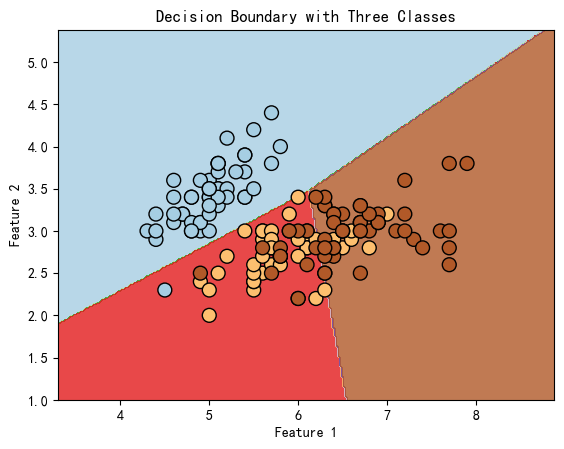

In [187]:
import numpy as np
import matplotlib.pyplot as plt

# 定义用于计算预测类别的函数
def predict_class(x, w, b):
    z = np.dot(x, w) + b
    probabilities = softmax(z)
    return np.argmax(probabilities, axis=1)  # 返回最大概率对应的类别

# 生成网格点并计算分类结果
def plot_decision_boundary(x, y, w_out, b_out, resolution=0.02):
    # 定义网格的边界
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # 计算网格中每个点的类别
    grid_points = np.c_[xx.ravel(), yy.ravel()]  # 将网格点转换为坐标对
    Z = predict_class(grid_points, w_out, b_out)
    Z = Z.reshape(xx.shape)

    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # 绘制训练数据点
    plt.scatter(x[:, 0], x[:, 1], c=np.argmax(y, axis=1), edgecolors='k', marker='o', s=100, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary with Three Classes')

    plt.show()

# 加载 Iris 数据集
iris = load_iris()
x = iris.data[:, :2]  # 取出前两列特征
y_labels = iris.target  # 获取目标标签（0, 1, 2 对应不同的鸢尾花种类）

# 转换成 one-hot 编码
y = np.zeros((y_labels.size, y_labels.max() + 1))
y[np.arange(y_labels.size), y_labels] = 1

# 初始化参数
w_tmp = np.zeros((x.shape[1], y.shape[1]))  # (n, k)
b_tmp = np.zeros((y.shape[1],))  # (k,)
alph = 0.1
iters = 10000

# 执行梯度下降
w_out, b_out, _ = gradient_descent_softmax(x, y, w_tmp, b_tmp, alph, iters)

# 绘制决策边界
plot_decision_boundary(x, y, w_out, b_out)


激活函数主要用于控制每个神经元的输出，并为神经网络引入非线性，使得网络能够处理复杂的任务。它在前向传播中使用。  
优化算法用于训练神经网络，通过最小化损失函数来更新模型参数，使得模型可以学习到更好的参数。它在反向传播过程中用于调整权重和偏置。  

LogisticRegression中就两个激活函数：  
Sigmoid 函数 用于二分类逻辑回归，将线性组合的输出映射为 0 到 1 之间的概率。  
Softmax 函数 用于多分类逻辑回归，将线性组合的输出转换为多个类别的概率分布。  

LogisticRegression 实现使用了不同的优化算法，如 liblinear、lbfgs、newton-cg、sag 和 saga，具体选择取决于你的问题规模、正则化需求以及数据集的大小。  

![jupyter](6.png)